In [1]:
import scipy.io
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import datetime
import statsmodels.api as sm

from sklearn import linear_model
from utils import multiplot
import pandas as pd

/anaconda3/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


# Data Loading and Exploration
After spending time on the tutorial, we started the exercise by loading and plotting the data in PowerValuesOctMay.mat, in order to visualise what we were up against. 

We could easily spot patterns for the weeks, week-ends and holidays.


In [2]:
mat = scipy.io.loadmat('PowerValuesOctMay.mat')
y = mat['MeasurementsTotal'].reshape(5736,)
y_serie = pd.Series(y)

In [3]:
dayone = datetime.datetime(2014,10,5)
x_date = np.array([])
for i in range(len(y)):
    x_date = np.append(x_date, [dayone+(datetime.timedelta(hours=1)*i)])
def construct_X(length):
    return pd.DataFrame([[
          np.sin(2*np.pi*i/1), 
          np.cos(2*np.pi*i/1),
          np.sin(2*np.pi*i/2), 
          np.cos(2*np.pi*i/2),
          np.sin(2*np.pi*i/4), 
          np.cos(2*np.pi*i/4),
          np.sin(2*np.pi*i/12), 
          np.cos(2*np.pi*i/12),
          np.sin(2*np.pi*i/24), 
          np.cos(2*np.pi*i/24),
          np.sin(2*np.pi*i/(2*24)), 
          np.cos(2*np.pi*i/(2*24)),
          np.sin(2*np.pi*i/(5*24)), 
          np.cos(2*np.pi*i/(5*24)),
        ] for i in range(length)], columns=['sin(2pi*t/1)', 'col(2pi*t/1)',
                                        ' sin(2pi*t/2)', 'col(2pi*t/2)',
                                         'sin(2pi*t/4)', 'col(2pi*t/4)',
                                           
                                         'sin(2pi*t/12)', 'col(2pi*t/12)',
                                             'sin(2pi*t/2*24)', 'col(2pi*t/2*24)',
                                            'sin(2pi*t/5*24)', 'col(2pi*t/5*24)',
                                         'sin(2pi*t/24)',' col(2pi*t/24)'])
x = construct_X(len(y))
x.head()

,sin(2pi*t/1),col(2pi*t/1),sin(2pi*t/2),col(2pi*t/2),sin(2pi*t/4),col(2pi*t/4),sin(2pi*t/12),col(2pi*t/12),sin(2pi*t/2*24),col(2pi*t/2*24),sin(2pi*t/5*24),col(2pi*t/5*24),sin(2pi*t/24),col(2pi*t/24)
0,0.000000e+00,1.0,0.000000e+00,1.0,0.000000e+00,1.000000e+00,0.000000,1.000000e+00,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000
1,-2.449294e-16,1.0,1.224647e-16,-1.0,1.000000e+00,6.123234e-17,0.500000,8.660254e-01,0.258819,0.965926,0.130526,0.991445,0.052336,0.998630
2,-4.898587e-16,1.0,-2.449294e-16,1.0,1.224647e-16,-1.000000e+00,0.866025,5.000000e-01,0.500000,0.866025,0.258819,0.965926,0.104528,0.994522
3,-7.347881e-16,1.0,3.673940e-16,-1.0,-1.000000e+00,-1.836970e-16,1.000000,6.123234e-17,0.707107,0.707107,0.382683,0.923880,0.156434,0.987688
4,-9.797174e-16,1.0,-4.898587e-16,1.0,-2.449294e-16,1.000000e+00,0.866025,-5.000000e-01,0.866025,0.500000,0.500000,0.866025,0.207912,0.978148


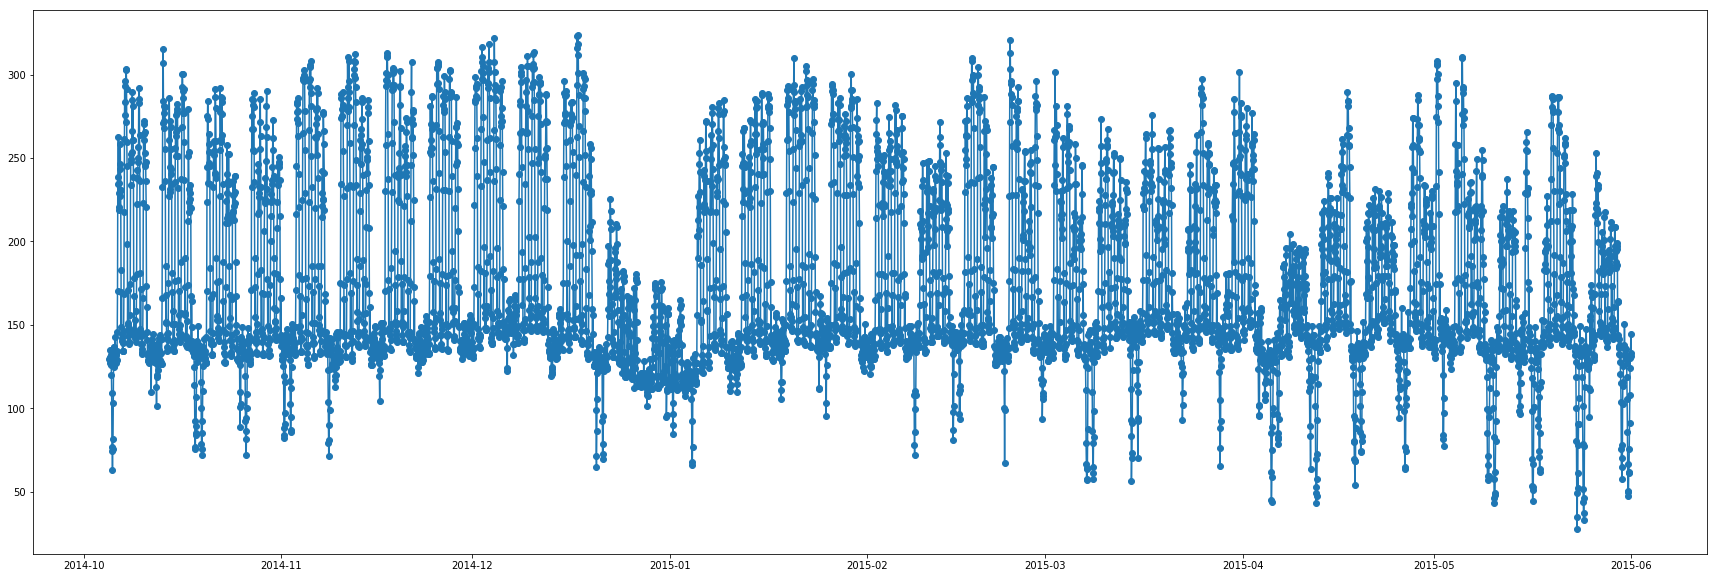

In [4]:
plt.figure(figsize=(30,10))
plt.plot(x_date,y, 'o-')
# ticks = [int(i)-1 for i in np.linspace(1, len(y), 10)]
# plt.xticks(x_date[ticks])
plt.savefig("orig")
plt.show();

# Model Fitting
Our first approach to fit our sinusoidal model was to follow the method used in the tutorial. 

We added some components of time periods corresponding to the patterns we spotted: hours (1,2,4,12) and days(1,2,5). 

We then performed a linear regression (least squares) on the entire data and you can see our initial fit below, for the whole data, 5 working days and a whole week.

The fit for the working days seemed beautiful, but in reality it was not that good for an entire week, especially due to the week-end patterns.

We also plotted some auto-correlation plots, to verify that the data was indeed stationary and iid.

In [5]:
regr = linear_model.LinearRegression()

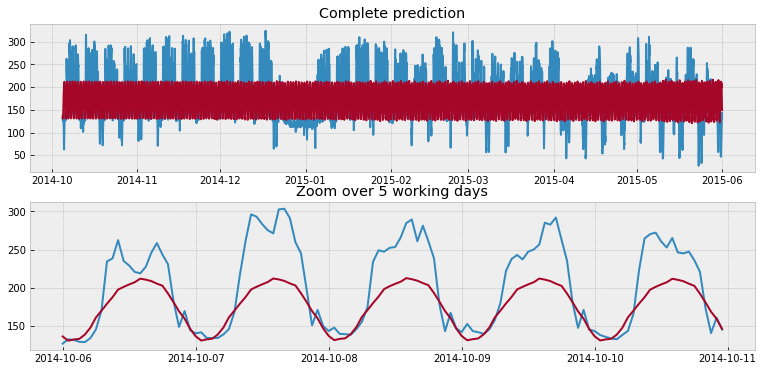

In [6]:
regr.fit(x, y)
y_pred = regr.predict(x)

with plt.style.context('bmh'): 
    fig, (ax1, ax2) = plt.subplots(2,1,figsize=(13,6))
    ax1.plot(x_date, y, label="data")
    ax1.plot(x_date, y_pred, label='prediction')
    ax1.set_title('Complete prediction')
    ax2.plot(x_date[24:6*24],y[24:6*24], label='data')
    ax2.plot(x_date[24:6*24],y_pred[24:6*24], label='prediction')
    ax2.set_title('Zoom over 5 working days')
#     ax3.plot(x_date[24:6*24], y_p)
plt.savefig("fitted")

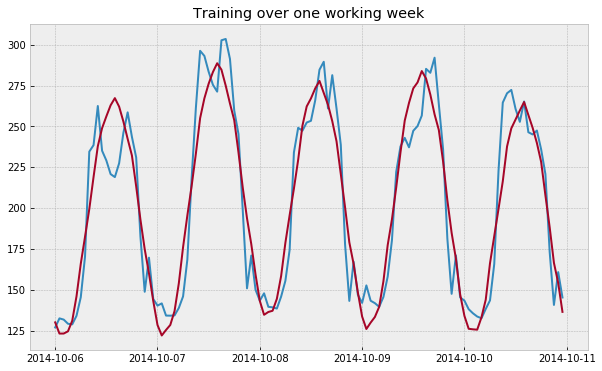

In [7]:
regr.fit(x[24:6*24], y[24:6*24])
y_pred = regr.predict(x)

with plt.style.context('bmh'): 
    fig = plt.figure(figsize=(10,6))
    plt.plot(x_date[24:6*24], y[24:6*24], label="data")
    plt.plot(x_date[24:6*24], y_pred[24:6*24], label='prediction')
    plt.title('Training over one working week')
#     ax3.plot(x_date[24:6*24], y_p)
plt.savefig("pred_one_week")

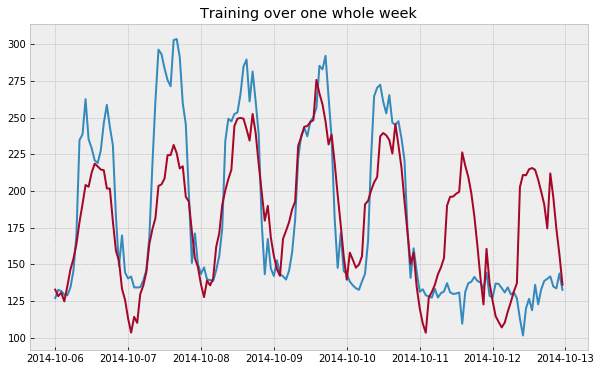

In [8]:
regr.fit(x[24:8*24], y[24:8*24])
y_pred = regr.predict(x)

with plt.style.context('bmh'): 
    fig = plt.figure(figsize=(10,6))
    plt.plot(x_date[24:8*24], y[24:8*24], label="data")
    plt.plot(x_date[24:8*24], y_pred[24:8*24], label='prediction')
    plt.title('Training over one whole week')
#     ax3.plot(x_date[24:6*24], y_p)
plt.savefig("pred_one_week")

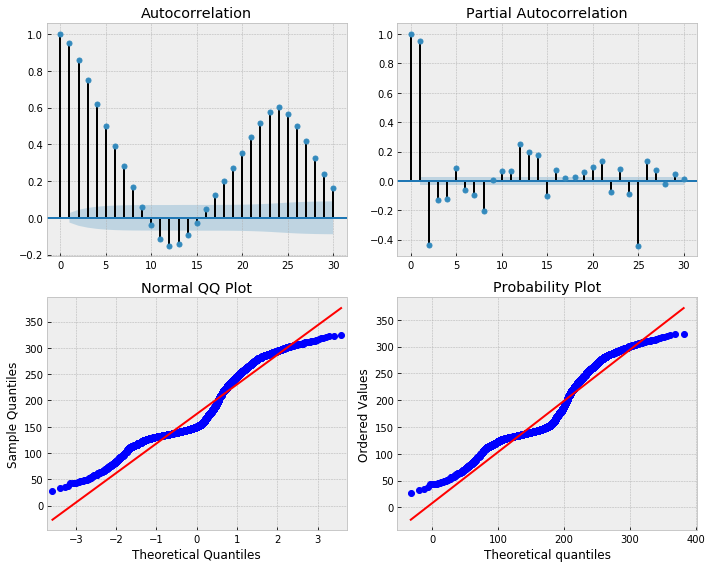

In [9]:
multiplot(y_serie, lags=30, figsize=(10,8))

## Separating week and weekends

After many more model tries, we could not improve our fit and we suspected that we needed to split the dataset into windows corresponding to the patterns we saw, in order to have a perfect fit. 

We thus decided to train one model for week days and one for weekends, removing the easter holidays from both. 

On the plots, the blue curve is the actual data, the orange our predicted data and the dashed lines represent the predicted intervals. 

The prediction intervals are $\pm 1.96 * \sigma$, with $\sigma$ being the root mean squares of residuals (Thm 3.1), since the model is fitted with least squares.
The residuals were calculated in the same way as for the tutorial.

We spotted more patterns, which could correspond to good friday, ascension and whit monday, but decided to leave them in for our model. 

It could be interesting to filter them out and see how it affects our prediction.

### Define holidays dates

In [10]:
start = np.datetime64(datetime.date(2014,10,5))
start_winter_holidays = np.datetime64(datetime.date(2014,12,20))
end_winter_holidays = np.datetime64(datetime.date(2015,1,5))
start_easter_holidays = np.datetime64(datetime.date(2015,4,4))
end_easter_holidays = np.datetime64(datetime.date(2015,4,12))
end = np.datetime64(datetime.date(2015,4,30))

### Separate week and weekend, remove holidays

In [11]:
df = pd.DataFrame(data={'measure': y, 'date': x_date}, 
                  index=np.arange(len(y)))
df_week = df[((df.index//24)%7 > 0) & ((df.index//24)%7 < 6)]
df_weekend = df[((df.index//24)%7 == 0) | ((df.index//24)%7 == 6)]

df_week_no_holidays = df_week[(df_week.date < start_winter_holidays) | 
                             ((df_week.date > end_winter_holidays) & (df_week.date < start_easter_holidays)) | 
                             (df_week.date > end_easter_holidays)]
df_weekend_no_holidays = df_weekend[(df_weekend.date < start_winter_holidays) | 
                             ((df_weekend.date > end_winter_holidays) & (df_weekend.date < start_easter_holidays)) | 
                             (df_weekend.date > end_easter_holidays)]

num_week_days = len(df_week_no_holidays)
num_weekend_days = len(df_weekend_no_holidays)

week_x = construct_X(num_week_days)
weekend_x = construct_X(num_weekend_days)

### Fit curve, compute residuals and $\sigma^2$

In [12]:
regr.fit(week_x, df_week_no_holidays.measure.values)
week_pred = regr.predict(construct_X(5*24 + num_week_days))
week_residuals = np.array(week_pred[:-5*24]) - \
                 np.array(df_week_no_holidays.measure.values)
sigma2_week = 1/(num_week_days - week_x.shape[1]) * np.sum(week_residuals**2)

In [13]:
regr.fit(weekend_x, df_weekend_no_holidays.measure.values)
weekend_pred = regr.predict(construct_X(2*24 + num_weekend_days))
weekend_residuals = np.array(weekend_pred[:-2*24]) - \
                 np.array(df_weekend_no_holidays.measure.values)
sigma2_weekend = 1/(num_weekend_days - weekend_x.shape[1]) * np.sum(weekend_residuals**2)

### Plot

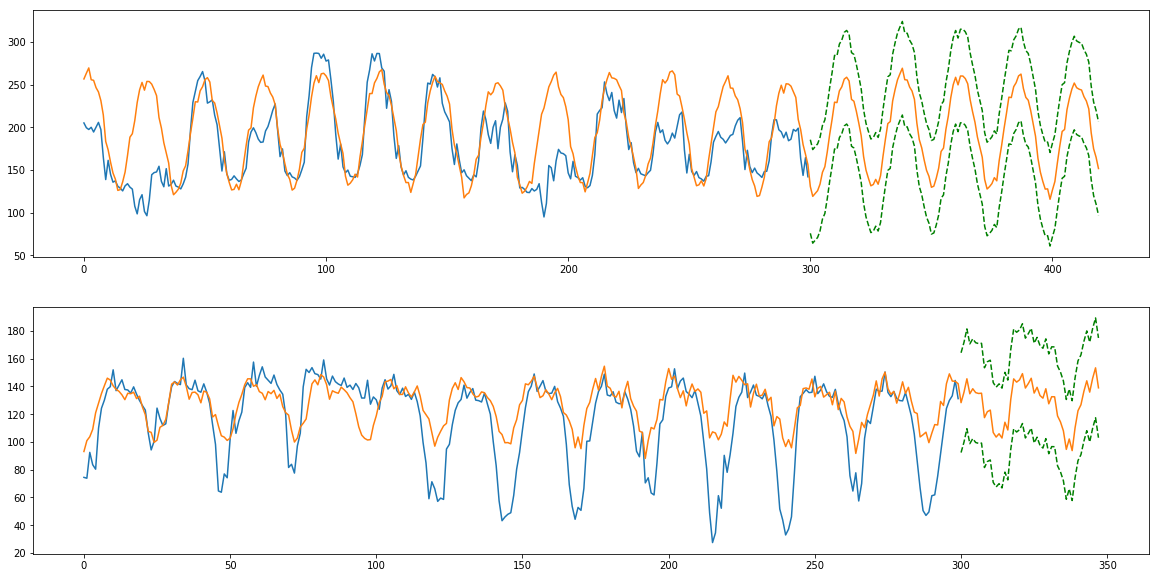

In [14]:
fig, (ax1, ax2) = plt.subplots(2,1,figsize=(20,10))

ax1.plot(df_week_no_holidays.measure.values[-300:])
ax1.plot(week_pred[-300-5*24:])
ax1.plot(np.arange(5*24)+300, week_pred[-5*24:] + 1.96*(sigma2_week**0.5), '--', c='g')
ax1.plot(np.arange(5*24)+300, week_pred[-5*24:] - 1.96*(sigma2_week**0.5), '--', c='g')
ax2.plot(df_weekend_no_holidays.measure.values[-300:])
ax2.plot(weekend_pred[-300-2*24:])
ax2.plot(np.arange(2*24)+300, weekend_pred[-2*24:] + 1.96*(sigma2_weekend**0.5), '--', c='g')
ax2.plot(np.arange(2*24)+300, weekend_pred[-2*24:] - 1.96*(sigma2_weekend**0.5), '--', c='g')
plt.show();

### Prediction for Given Dates

In [15]:
target_1_inweek = 4*24 + 11
target_2_inweek = 4*24 + 21
target_3_inweekend = 15

In [16]:
print("Prediction at 95% level for Friday June 5th 2015 11h-12h {:.5f} +- {:.5f}"\
      .format(week_pred[num_week_days + target_1_inweek], 1.96*(sigma2_week**0.5)))
print("Prediction at 95% level for Friday June 5th 2015 21h-22h {:.5f} +- {:.5f}"\
      .format(week_pred[num_week_days + target_2_inweek], 1.96*(sigma2_week**0.5)))
print("Prediction at 95% level for Saturday June 6th 2015 15h-16h {:.5f} +- {:.5f}"\
      .format(weekend_pred[num_weekend_days + target_3_inweekend], 1.96*(sigma2_weekend**0.5)))

Prediction at 95% level for Friday June 5th 2015 11h-12h 234.00513 +- 54.81704
Prediction at 95% level for Friday June 5th 2015 21h-22h 174.76551 +- 54.81704
Prediction at 95% level for Saturday June 6th 2015 15h-16h 114.12250 +- 35.91485


## ARMA

We decided to try to fit an ARMA model with the help of the stats models api. 

Since we know from above that the data is stationary and iid, it made sense to do so.

The fit on the training data was beautiful, but unfortunately, the predicted data was terrible. 

After playing around with the p and q coefficients, we still didn’t get a good fit and the BIC values were off the roof, so we did not manage to resolve the overfitting problem. 

We thus decided to continue with the above method instead, but we left our exploration for comparison.

In [17]:
# Fit the model
mod = sm.tsa.statespace.SARIMAX(y_serie.values[:-168], trend='c', order=(1,0,1))
res = mod.fit(disp=False)
print(res.summary())

                           Statespace Model Results                           
Dep. Variable:                      y   No. Observations:                 5568
Model:               SARIMAX(1, 0, 1)   Log Likelihood              -23450.747
Date:                Mon, 15 Apr 2019   AIC                          46909.494
Time:                        19:03:02   BIC                          46935.993
Sample:                             0   HQIC                         46918.731
                               - 5568                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     14.0549      1.201     11.706      0.000      11.702      16.408
ar.L1          0.9196      0.006    151.531      0.000       0.908       0.932
ma.L1          0.3836      0.012     33.072      0.0

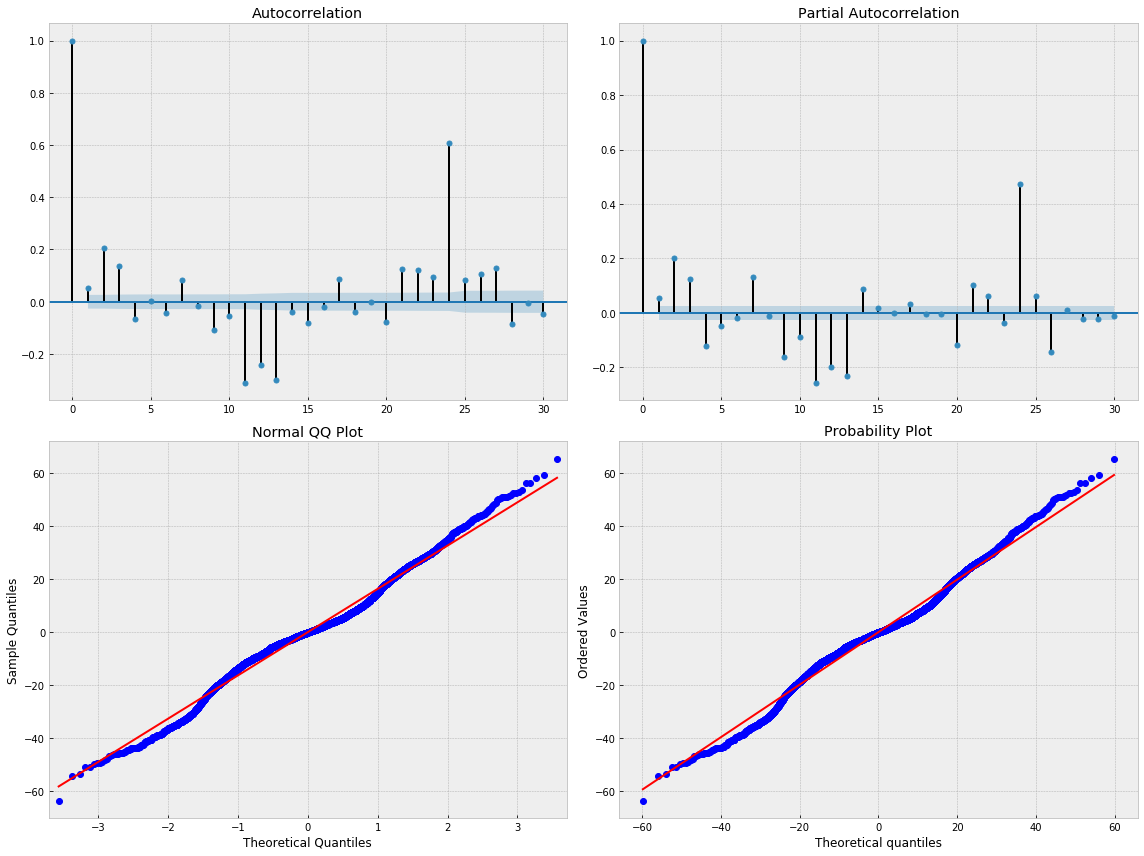

In [18]:
multiplot(res.resid, lags=30)

In [19]:
mod = sm.tsa.statespace.SARIMAX(y_serie.values[:-168], order=(2,0,1), enforce_invertibility=False, seasonal_order=(1,0,1,24))
# import statsmodels
# mod = statsmodels.tsa.arima_model.ARMA(y_serie[:-168], order=(9,9))
res = mod.fit(disp=False)
print(res.summary())
ynewpred = res.predict(start=len(y_serie.values)-168,end=len(y_serie.values))

                                 Statespace Model Results                                 
Dep. Variable:                                  y   No. Observations:                 5568
Model:             SARIMAX(2, 0, 1)x(1, 0, 1, 24)   Log Likelihood              -21305.783
Date:                            Mon, 15 Apr 2019   AIC                          42623.565
Time:                                    19:03:19   BIC                          42663.314
Sample:                                         0   HQIC                         42637.421
                                           - 5568                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.6337      0.019     84.852      0.000       1.596       1.671
ar.L2         -0.6732      0.019   

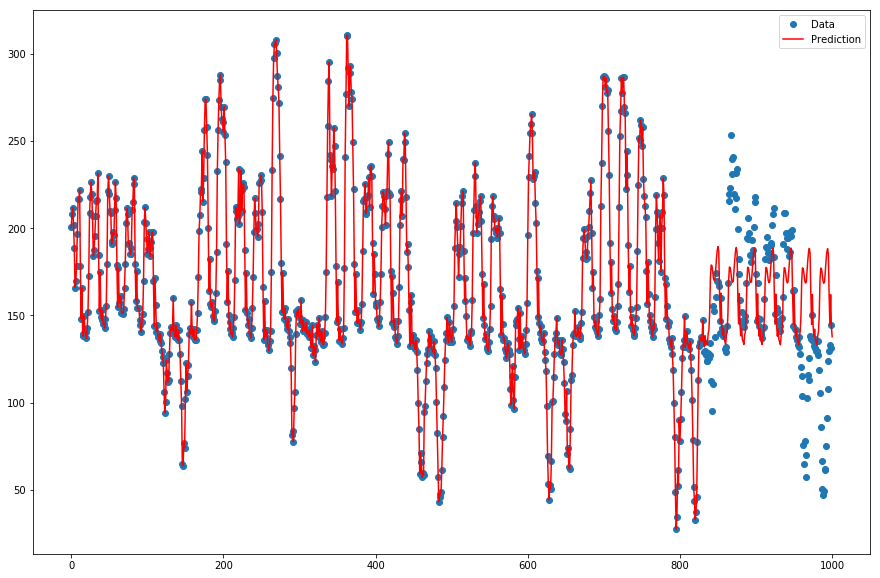

In [20]:
fig, ax = plt.subplots(figsize=(15, 10))

ax.plot(y_serie.values[-1000:], 'o', label="Data")
ax.plot(np.hstack((y_serie.values[-1000:-168], ynewpred)), 'r', label="Prediction")
ax.legend(loc="best");